# libraries

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud

In [79]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
import re

import nltk as nl
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer 

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score

from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier

In [15]:
nl.download('wordnet')
nl.download('omw-1.4')
nl.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\spjay\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\spjay\AppData\Roaming\nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\spjay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
stopwords = stopwords.words('english')
stemmer = SnowballStemmer("english")
lemmatizer = WordNetLemmatizer()

# Data Collection & Pre-Processing

In [3]:
ds=pd.read_csv(r"C:\Laptop\F2\Data Science\Datasets\spam_ham_dataset.csv")

In [4]:
ds

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [6]:
#checking for null values
ds.isnull()

,Unnamed: 0,label,text,label_num
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
5166,False,False,False,False
5167,False,False,False,False
5168,False,False,False,False
5169,False,False,False,False


In [7]:
#checking for null values
ds.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [8]:
# checking the number of rows and columns
ds.shape

(5171, 4)

In [11]:
#checking duplicate values
ds.duplicated().sum()

0

In [17]:
#Defining function to claran data
def clean_text(text):
    new_text=text.lower()
    clean_text= re.sub("[^a-z]+"," ",new_text)
    clean_text_stopwords = ""
    for i in clean_text.split(" ")[1:]:
        if not i in stopwords and len(i) > 3:
            clean_text_stopwords += i
            clean_text_stopwords += " "
            clean_text_stopwords=lemmatizer.lemmatize(clean_text_stopwords)
            clean_text_stopwords=stemmer.stem(clean_text_stopwords)
    return clean_text_stopwords

In [18]:
#applying Function
ds["text_clean"] = ds.text.apply(clean_text)

In [19]:
ds.head()

,Unnamed: 0,label,text,label_num,text_clean
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,enron methanol meter follow note gave monday p...
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,january attached file hplnol hplnol
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,neon retreat around wonderful time year neon l...
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,photoshop windows office cheap main trending a...
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,indian springs deal book teco revenue understa...


In [26]:
# removing unwanted columns
ds=ds.drop(['text'], axis=1)


In [28]:
ds=ds.drop(['Unnamed: 0'], axis=1)

In [30]:
ds['len'] = ds['text_clean'].str.len()

In [31]:
ds.head()

,label,label_num,text_clean,len
0,ham,0,enron methanol meter follow note gave monday p...,202
1,ham,0,january attached file hplnol hplnol,36
2,ham,0,neon retreat around wonderful time year neon l...,1294
3,spam,1,photoshop windows office cheap main trending a...,387
4,ham,0,indian springs deal book teco revenue understa...,174


### Visulaization

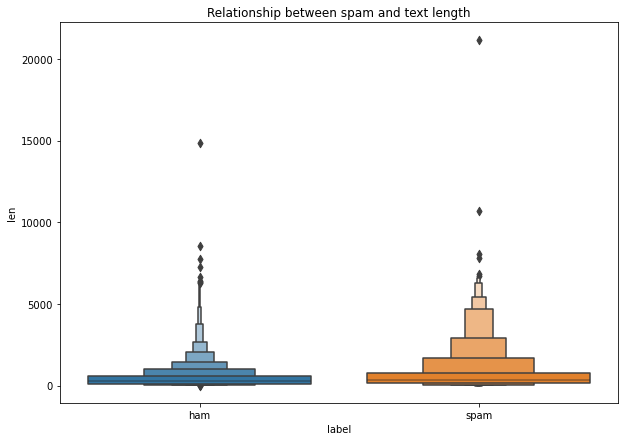

In [35]:
plt.rcParams['figure.figsize'] = (10, 7)
sns.boxenplot(x = ds['label'], y = ds['len'])
plt.title('Relationship between spam and text length')
plt.show()

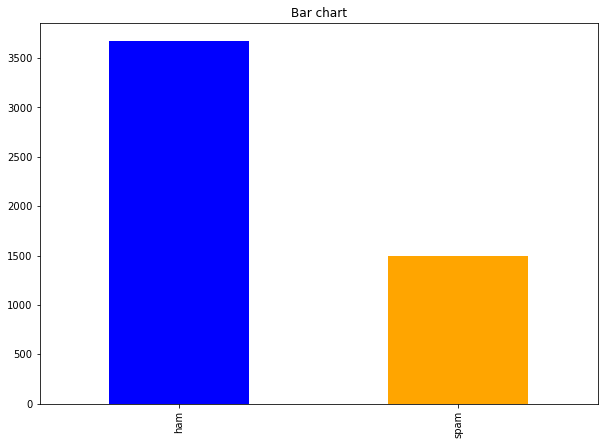

In [39]:
count_Class=pd.value_counts(ds["label"], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

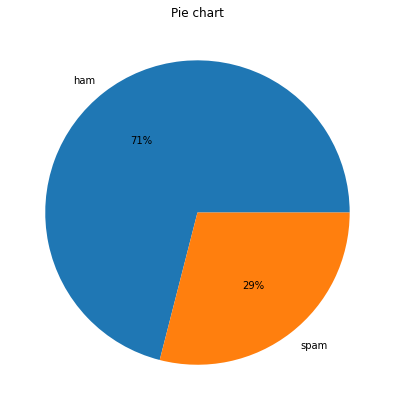

In [40]:
count_Class.plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Pie chart')
plt.ylabel('')
plt.show()

In [43]:
count1 = Counter(" ".join(ds[ds['label_num']==0]["text_clean"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in non-spam", 1 : "count"})
count2 = Counter(" ".join(ds[ds['label_num']==1]["text_clean"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count_"})

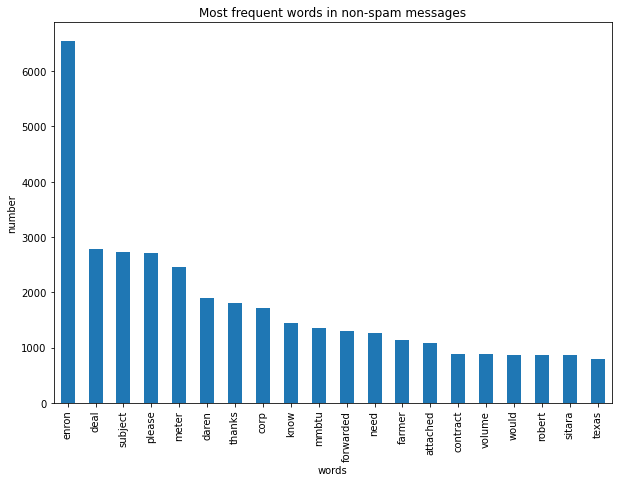

In [46]:
df1.plot.bar(legend = False)
y_pos = np.arange(len(df1["words in non-spam"]))
plt.xticks(y_pos, df1["words in non-spam"])
plt.title('Most frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

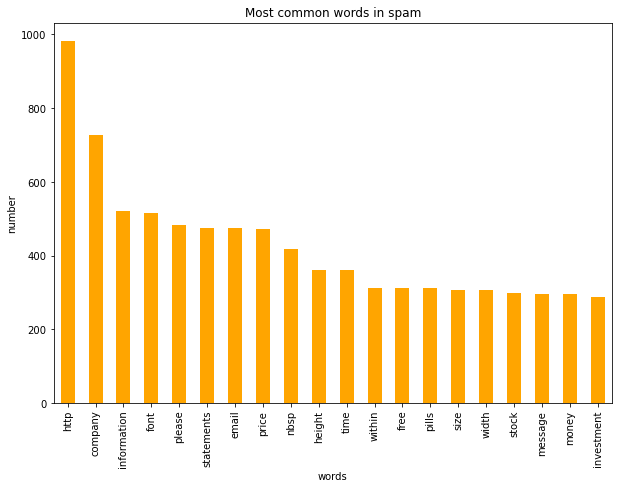

In [47]:
df2.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(df2["words in spam"]))
plt.xticks(y_pos, df2["words in spam"])
plt.title('Most common words in spam')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

Text(0.5, 1.0, 'Spam Word Cloud')

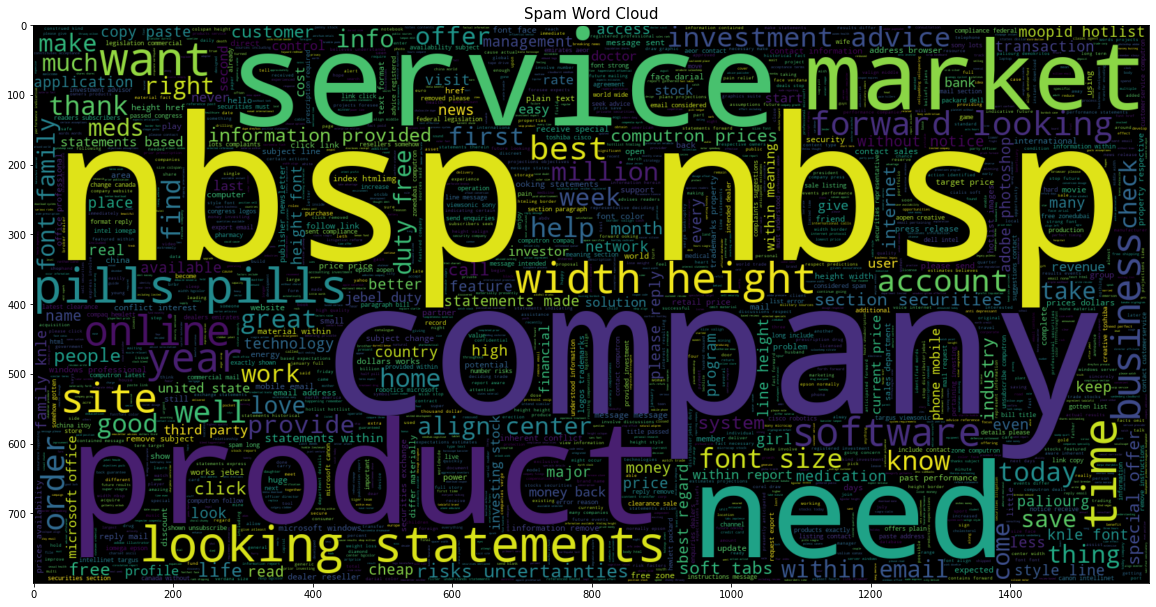

In [52]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(ds[ds.label_num == 1].text_clean))
plt.imshow(wc , interpolation = 'bilinear*')
plt.title("Spam Word Cloud",fontsize=20)


Text(0.5, 1.0, 'Ham Word Cloud')

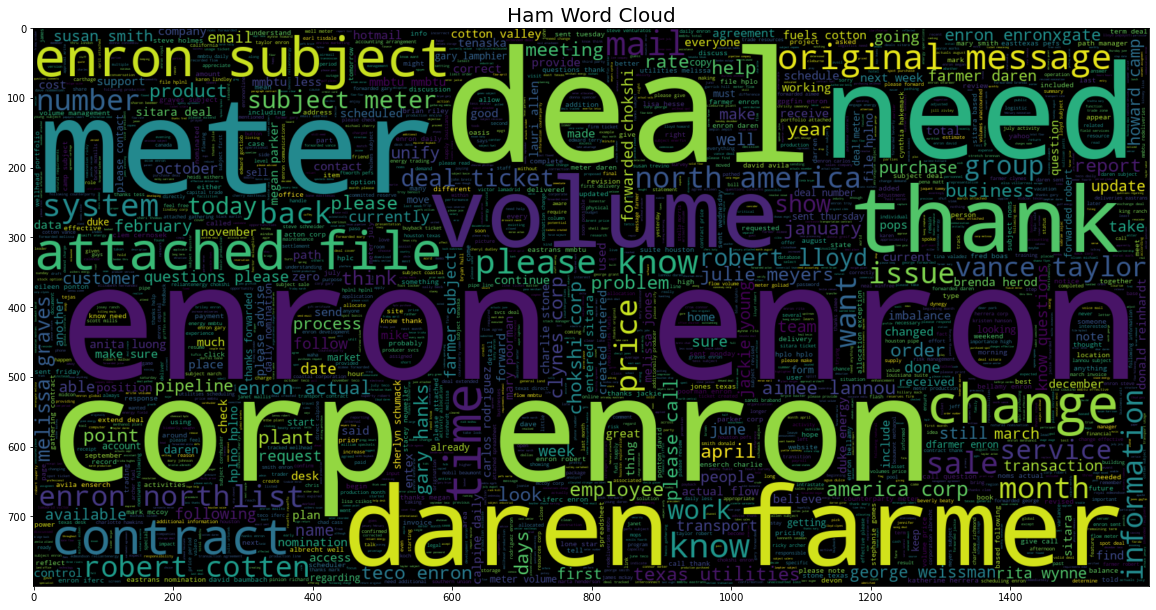

In [53]:

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(ds[ds.label_num == 0].text_clean))
plt.imshow(wc , interpolation = 'bilinear')
plt.title("Ham Word Cloud",fontsize=20)



# Label Data

In [15]:
# label spam mail as 0;  ham mail as 1;

ds.loc[ds['Category'] == 'spam', 'Category',] = 0
ds.loc[ds['Category'] == 'ham', 'Category',] = 1


In [54]:
# separating the data as texts and label

x = ds['text_clean']

y = ds['label_num']

In [55]:
x

0       enron methanol meter follow note gave monday p...
1                    january attached file hplnol hplnol 
2       neon retreat around wonderful time year neon l...
3       photoshop windows office cheap main trending a...
4       indian springs deal book teco revenue understa...
                              ...                        
5166    transport volumes decreased contract thanks fo...
5167    following noms take extra mmcf weekend next we...
5168    calpine daily nomination julie mention earlier...
5169    industrial worksheets august activity attached...
5170    important online banking alert dear valued cit...
Name: text_clean, Length: 5171, dtype: object

In [56]:
y

0       0
1       0
2       0
3       1
4       0
       ..
5166    0
5167    0
5168    0
5169    0
5170    1
Name: label_num, Length: 5171, dtype: int64

In [57]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   label       5171 non-null   object
 1   label_num   5171 non-null   int64 
 2   text_clean  5171 non-null   object
 3   len         5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


# Splitting the data into training data & test data

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

In [59]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(5171,)
(4136,)
(1035,)


# Feature Extraction #converting text data into numerical

In [60]:
# transform the text data to feature vectors that can be used as input to the Logistic regression

feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase='True')

x_train_features = feature_extraction.fit_transform(x_train)
x_test_features = feature_extraction.transform(x_test)

# convert Y_train and Y_test values as integers

y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [61]:
print(x_train)

2209    hplc wellhead daren list deals need move wellh...
2000    mobil chemical meter expense transport help ne...
5030    revised eastrans revised following inability r...
1376    exxon company global sitara checked sitara ver...
1564       pharmacy want cheap pain killers http nopalns 
                              ...                        
789     incr ease hood inch atter octor roved nically ...
968     subscribers receive first notice away stocks t...
1667      neon march neon lesson march experiencing week 
3321    first delivery pure resources vance deal creat...
1688    enhance chest size email loading image loading...
Name: text_clean, Length: 4136, dtype: object


In [62]:
print(x_train_features)

  (0, 24360)	0.11491818640010296
  (0, 36270)	0.1975193276215325
  (0, 30708)	0.1530058817568417
  (0, 20590)	0.1289907953824203
  (0, 29687)	0.15470113022872423
  (0, 11885)	0.16070281406231376
  (0, 16724)	0.18166331828158577
  (0, 25854)	0.09921726501719767
  (0, 14318)	0.1975193276215325
  (0, 11723)	0.33161461788327806
  (0, 25227)	0.1975193276215325
  (0, 21944)	0.5993109797781173
  (0, 8026)	0.23303703224302313
  (0, 22738)	0.12212578697683257
  (0, 30570)	0.12787470154194172
  (0, 31695)	0.16886189109678842
  (0, 35267)	0.17655882340226048
  (0, 26294)	0.1114804229899523
  (0, 23236)	0.0626825872945925
  (0, 9131)	0.08051183531024973
  (0, 20365)	0.08464133148189819
  (0, 8950)	0.060037321152043056
  (0, 36276)	0.2073395536988784
  (0, 16583)	0.2147082443018068
  (1, 33372)	0.021379924337593625
  :	:
  (4135, 2658)	0.07645530592473347
  (4135, 2438)	0.07430701467209258
  (4135, 4386)	0.07255173291144337
  (4135, 11279)	0.07430701467209258
  (4135, 21169)	0.07255173291144337
  (

# Training the Model ( Logistic Regression )

In [63]:
model = LogisticRegression()

In [64]:
# training the Logistic Regression model with the training data
model.fit(x_train_features, y_train)

LogisticRegression()

# Evaluating the trained model

In [65]:
# prediction on training data

prediction_on_training_data = model.predict(x_train_features)
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)

In [66]:
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.9963733075435203


In [67]:
# prediction on test data

prediction_on_test_data = model.predict(x_test_features)
accuracy_on_test_data = accuracy_score(y_test, prediction_on_test_data)

In [68]:
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.9816425120772947


In [80]:
# Model Evaluation
y_predict_logi = model.predict(x_test_features)
acc = accuracy_score(y_test, y_predict_logi)
roc = roc_auc_score(y_test, y_predict_logi)
prec = precision_score(y_test, y_predict_logi)
rec = recall_score(y_test, y_predict_logi)
f1 = f1_score(y_test, y_predict_logi)

results = pd.DataFrame([['Logistic Regression',acc, prec, rec, f1,roc]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.981643,0.949843,0.990196,0.9696,0.984124


# Building a Predictive System

In [81]:
input_mail = ["Your free ringtone is waiting to be collected"]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

[1]
Ham mail
